# <center> CFRM521 Machine Learning in Finance
## <center> Lecture 9
### <center> Yoshihiro Shirai

# k-Nearest Neighbors

- Not in textbook

#  0. Overview of the lecture

- We discuss the **k-Nearest Neighbors (k-NN)** algorithm which is a simple supervised learning technique capable of both regression and classification. Like ensemble learning, it may also be used as a wrapper for other ML methods.

- This concludes our discussion of supervised learning methods, though we will later consider neural networks. In the next lectures, we consider dimensionality reduction and unsupervised learning.

# 1. k-Nearest Neighbors

- k-Nearest Neighbors (k-NN) is a very simple supervised-learning technique. One might argue that it is perhaps too simple to even be qualified as a Machine Learning technique.

- k-NN is a non-parametric (or instance-based) method. As you will see, there is no pre-assumed model. Most k-NN algorithms do not even involve any type of training (that is, minimizing a cost function).

- k-NN can be applied to regression and classification tasks.

## 1.1 k-NN classification

- Let us first consider k-NN classification. The underlying idea is as follows.

- Suppose you are given a labeled dataset $\{(\mathbf{X}_n, y_n)\}_{n=1}^N$, in which $\mathbf{X}_n$ are $D$-dimensional vectors (i.e. there are $D$ features) and $y_n$ take $M$ possible values (i.e. there are $M$ classes).

- You are given a new feature vector $\mathbf{X}^*$ and want to determine the corresponding class $y^*$.

- A k-NN classifier proceed as follows. It "sees" each feature vector $\mathbf{X}_n$ as an element of a $D$-dimensional <strong>feature space</strong> with an associated <strong>distance</strong> between any two element.

- To assign a class $y^*$ to $\mathbf{X}^*$, a k-NN algorithm fist finds $k$ "nearest neighbors" of $\mathbf{X}^*$ in the dataset. These are observations in the dataset that are nearest to $\mathbf{X}^*$ in the feature space according to the distance measure. The algorithm then chooses $y^*$ as the label most seen among the neighbors. This is a simple majority vote.

- Example: a 3-NN classifier (i.e. $k=3$) finds that among 3 nearest neighbors of $\mathbf{X}^*$, 2 has label "A", and 1 has label "B". Then $y^*=$ "A".

- k-NN can easily assign probabilities to each class as well. The probability of a class is the fraction of neighbors within that class. In the previous example, the 3-NN classifier assigns probability 2/3 to class "A" and probability 1/3 to class "B". If there is another class in the dataset (say, a class "C"), it would assigned probability 0.

- Another variation is to assign weight among the neighbors such that nearer neighbors get more influence over the outcome. For example, one can assign the weight $\frac{1}{\|\mathbf{X}_n-\mathbf{X}^*\|}$ to the neighbor $\mathbf{X}_n$. In such a case, instead of counting the number of neighbors, we would sum their weights. The label with the highest sum gets assigned as $y^*$.

- The distance function is interpreted as a measure of similarity between two features and depends on the nature of the data. Depending on the context, we can use, for example,
    - Euclidean distance ($\ell_2$ norm): $\|\mathbf{X}-\mathbf{X}'\|_2=\sqrt{\sum_{d=1}^D (X_d-X_d')^2}$
    - Manhattan distance ($\ell_1$ norm): $\|\mathbf{X}-\mathbf{X}'\|_1=\sum_{d=1}^D |X_d-X_d'|$
    - Chebyshev distance ($\ell_\infty$ or max norm): $\|\mathbf{X}-\mathbf{X}'\|_\infty=\max\{|X_d-X_d'|: d=1\dots D\}$
    - Cosine similarity: cosine similarity of $\mathbf{X}$ and $\mathbf{X}'$ $\displaystyle=\frac{\mathbf{X}.\mathbf{X}'}{\|\mathbf{X}\|_2\|\mathbf{X}'\|_2}$ (What is the geometric meaning of cosine similarity?)

- As you can see, there is no training involved in k-NN classifier. We go directly from the training data to forecasting. Such ML method are called <strong>lazy</strong>.

- In contrast, algorithms that needs to be trained before being able to forecast (such as everything else we have seen so far) are called <strong>eager</strong>.

- Lazy algorithms are most advantageous in scenarios where:
    1. new data comes <strong>frequently</strong>, and
    2. each additional observation <strong>substantially</strong> changes our understanding (that is, it has high information content)
    
    In such scenario, an eager method becomes outdated quickly as we would not have time to train it fast enough.

- There are, of course, downsides to k-NN (and lazy algorithms in general). For example, although their (non-existing) training is lightning fast, they can be very slow in prediction. This is because they need to go through the whole training set (e.g. to find the nearest neighbors) each time a new prediction is being made. In contrast, the prediction phase of eager algorithms is relatively fast as it only involves evaluating a function.

- Some final remarks before an example code:
    - The hyper-parameters for (the basic) k-NN are: 1) the number of neighbors k, 2) the distance measure, and 3) the weight function applied to neighbors. As in general ML algorithm, there is a bias-variance tradeoff in choosing a good value for these hyper-parameters which can be found by K-fold cross validation and grid/randomized search.
    - k-NN is sensitive to scaling of features (since they rely on a distance measure). Don't forget to scale the features before using k-NN!
    - In skewed datasets (that is, when some class have much more observations than other classes), the basic k-NN (with equal weight among neighbors) will do poorly. This is because the class with a lot of observations can dominate other classes. Consider the following example: there is a dataset with 10 observations, nine of which are of class "A" and one is of class "B". What is a prediction of 3-NN classifier?
    - One way to alleviate the last problem is by assigning weights to neighbors. Can you see how this would help?



- Let us see k-NN in action. We are to classify the gender of a person based on their hight and weight. We can get the height (in inches) and weight (in lbs) of 500 men and 500 women from: https://www.kaggle.com/mustafaali96/weight-height.

- Let us load the dataset, assuming that you have downloaded it and saved it as "weight-height.csv" in your working directory.

In [2]:
import pandas as pd
data = pd.read_csv("weight-height.csv")

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


- As we mentioned, it is important to scale the features. Let us standardize the features and store the features and response variable as $X$ and $y$.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data[["Height", "Weight"]].values)
X.mean(axis=0), X.std(axis=0)

(array([2.27373675e-16, 4.77484718e-16]), array([1., 1.]))

In [6]:
import numpy as np
y = data["Gender"].values=="Female"
np.unique(y)

array([False,  True])

- Here is a simple scatter plot of the scaled height and weight.

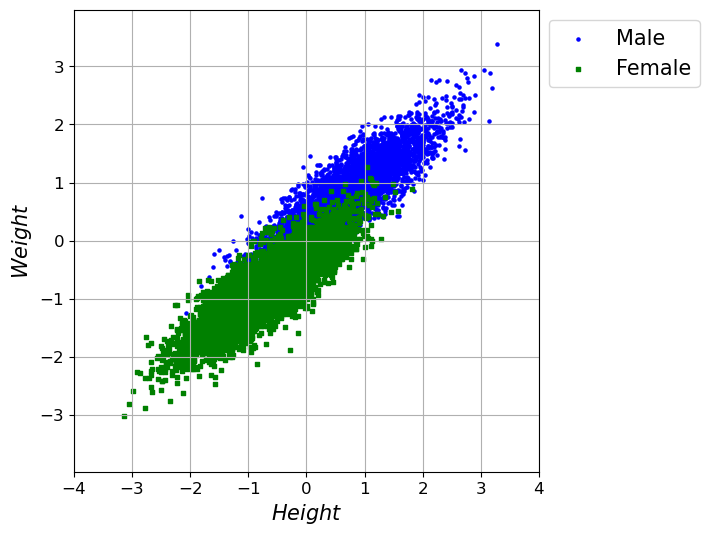

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(6,6))
plt.grid(True, which='both'); plt.axis('equal')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", s=5, c="b", label="Male")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="s", s=5, c="g", label="Female")
plt.xlabel(r"$Height$", fontsize=15)
plt.ylabel(r"$Weight$", fontsize=15, rotation=90)
plt.legend(fontsize=15, loc='upper left', bbox_to_anchor=(1, 1))
plt.axis([-4, 4, -4, 4])
plt.show()

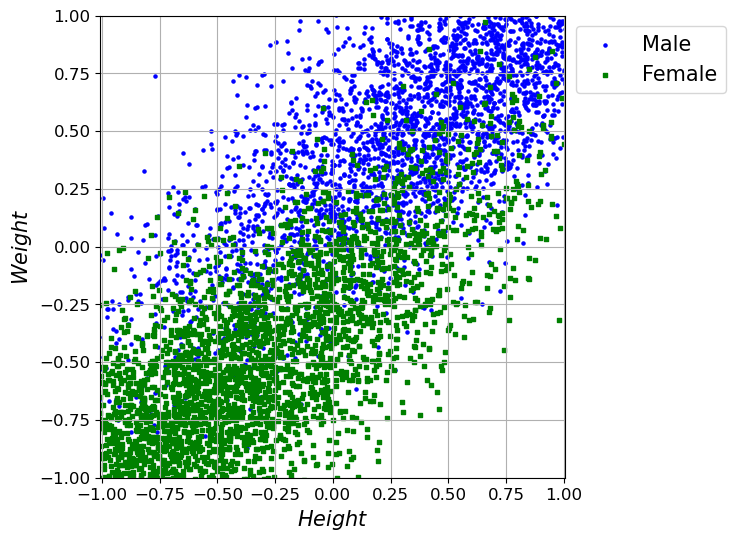

In [10]:
plt.figure(figsize=(6,6))
plt.grid(True, which='both'); plt.axis('equal')
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", s=5, c="b", label="Male")
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="s", s=5, c="g", label="Female")
plt.xlabel(r"$Height$", fontsize=15)
plt.ylabel(r"$Weight$", fontsize=15, rotation=90)
plt.legend(fontsize=15, loc='upper left', bbox_to_anchor=(1, 1))
plt.axis([-1, 1, -1, 1])
plt.show()

- To see k-NN more clearly, let us reduce the number of observations to 100 men and 100 women. Also, we want the observations to be near the decision boundary. For example, we consider only men and women with standardized height and weight in the interval $[−1,1]$

In [11]:
ave_Female = np.logical_and.reduce([
    -1.0 <= X[:,0], X[:,0] <= 1.0,
    -1.0 <= X[:,1], X[:,1] <= 1.0,
    y
])
ave_Male = np.logical_and.reduce([
    -1.0 <= X[:,0], X[:,0] <= 1.0,
    -1.0 <= X[:,1], X[:,1] <= 1.0,
    np.logical_not(y)
])

In [12]:
size = 100
X0 = np.concatenate([X[ave_Female][:size], X[ave_Male][:size]])
y0 = np.concatenate([y[ave_Female][:size], y[ave_Male][:size]])

- Let us visualize the subset we chose.

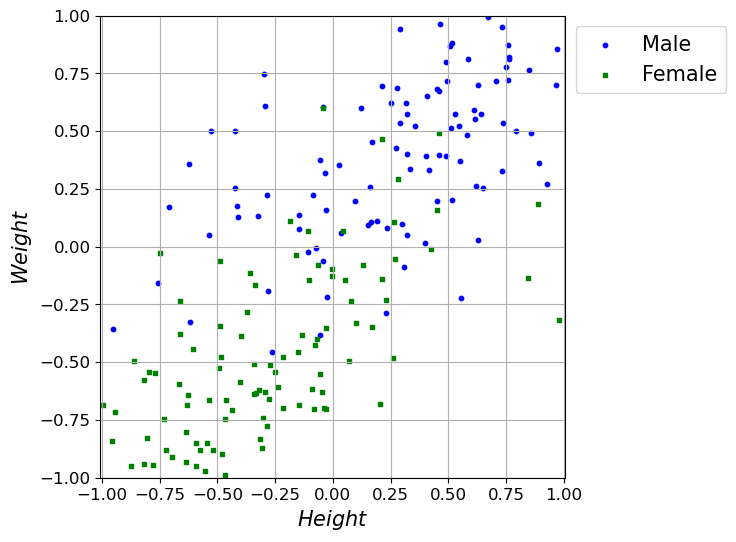

In [13]:
plt.figure(figsize=(6,6))
plt.grid(True, which='both'); plt.axis('equal')
plt.scatter(X0[:, 0][y0==0], X0[:, 1][y0==0], marker="o", s=10, c="b", label="Male")
plt.scatter(X0[:, 0][y0==1], X0[:, 1][y0==1], marker="s", s=10, c="g", label="Female")
plt.xlabel(r"$Height$", fontsize=15)
plt.ylabel(r"$Weight$", fontsize=15, rotation=90)
plt.legend(fontsize=15, loc='upper left', bbox_to_anchor=(1, 1))
plt.axis([-1, 1, -1, 1])
plt.show()

- k-NN classifier is implemented as <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier"><code>sklearn.neighbors.KNeighborsClassifier</code></a>. It has arguments for choosing "k", a weight scheme, the distance function, etc. Consult sklearn documentation for details.

- The following function <code>plot_knclf</code> plots the classification regions for different values of the hyper-parameter <code>n_neighbors</code> (i.e. the number of neighbors "k" ).

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

def plot_knclf(X, y):
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    kn_clf = KNeighborsClassifier(n_jobs=-1)
    H, W = np.meshgrid(
            np.linspace(-4, 4, 500).reshape(-1,),
            np.linspace(-4, 4, 500).reshape(-1,),
        )
    X_new = np.c_[H.ravel(), W.ravel()]

    subplots=[221,222,223,224]
    plt.figure(figsize=(12, 12))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    justonce = True
    for idx, K in enumerate([1, 5, 20,100]):
        kn_clf.set_params(n_neighbors=K).fit(X, y)
        y_predict = kn_clf.predict(X_new)
        zz = y_predict.reshape(H.shape)
        ax=plt.subplot(subplots[idx])
        ax.grid(True, which='both'); ax.axis('equal')
        plt.contourf(H, W, zz, cmap=ListedColormap(['#9898ff','#a0faa0']))
        plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", s=5, c="b", label="Male")
        plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="s", s=5, c="g", label="Female")    
        plt.xlabel(r"$Height$", fontsize=15)
        plt.ylabel(r"$Weight$", fontsize=15, rotation=90)
        if justonce:
            plt.legend(loc="upper left", fontsize=10)
            justonce=False
        plt.title("$k = {}$".format(K), fontsize=16)
        plt.axis([-1, 1, -1, 1])
    plt.show()

- Below, we see 4 plots of the k-NN classification using only the subsample.

- As you can see, higher values of k result in a more smooth and regular decision boundary (that is, lower variance and higher bias). In other words, higher k results in a "simpler" model.

c:\Users\yoshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\yoshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

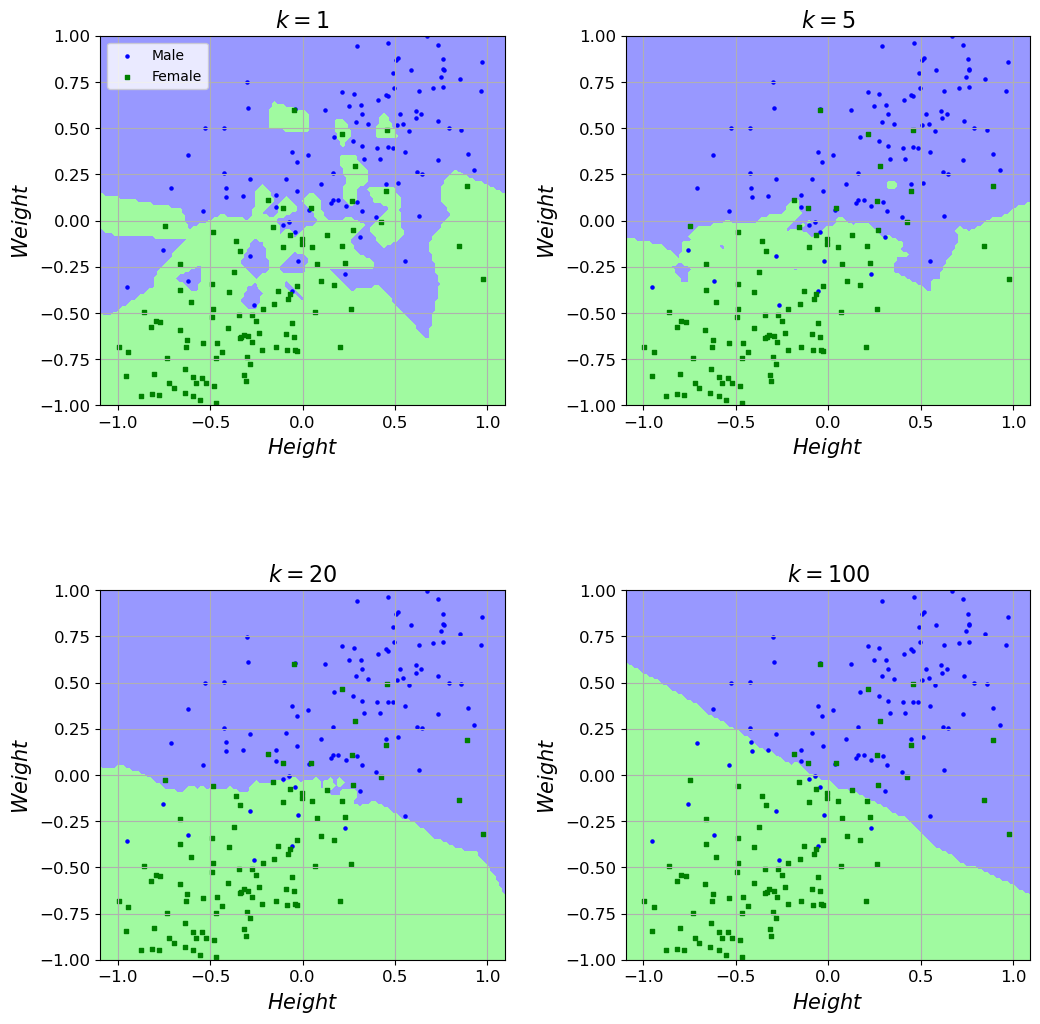

In [15]:
plot_knclf(X0, y0)

- The following plots show the decision boundary using the whole data set, but plotted only in the region $[−1,1]^2$

c:\Users\yoshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\yoshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

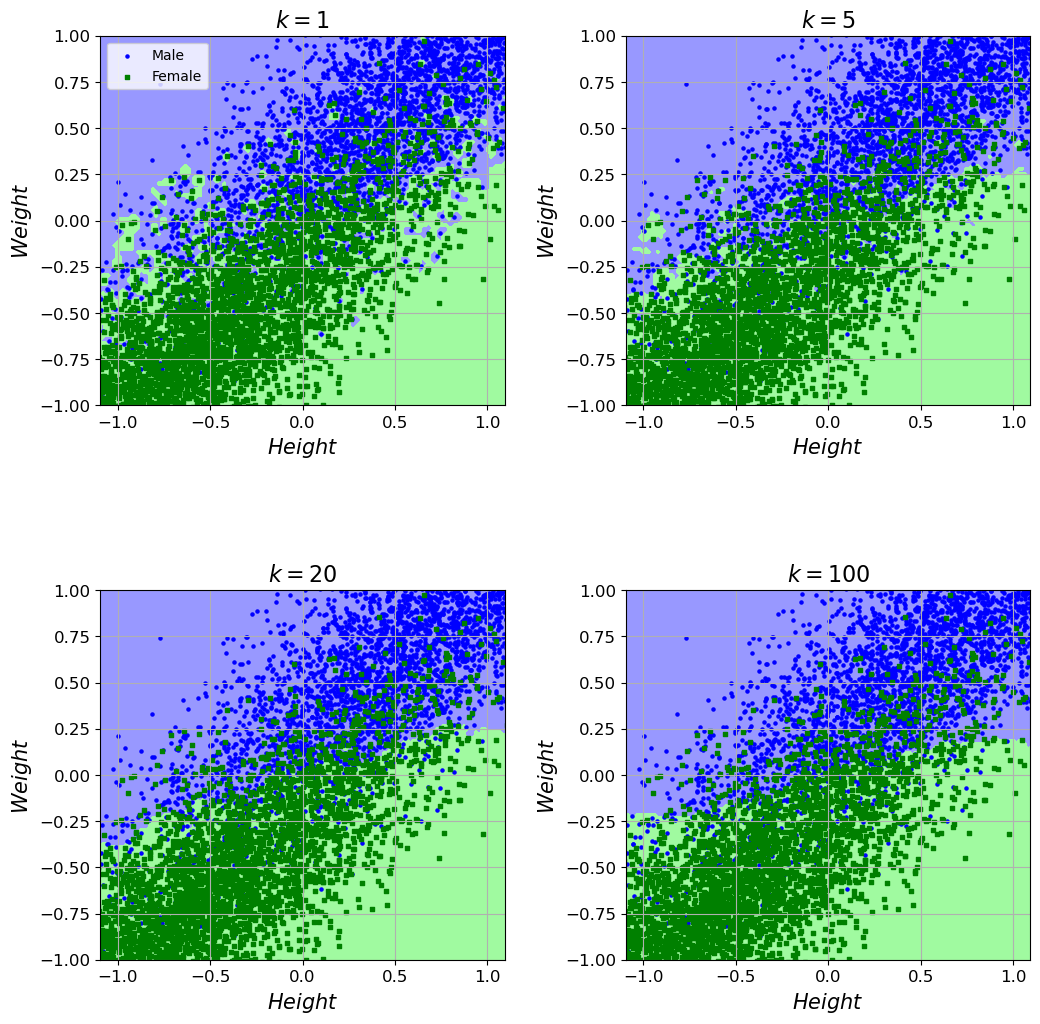

In [16]:
plot_knclf(X, y)

## k-NN regression

- The underlying idea of k-NN can be easily applied to regression.

- As in k-NN classification, we first find k nearest neighbors to a new feature vector $\mathbf{X}^*$. Let these neighbors be $\{(\mathbf{X}_{i}, y_{i})\}_{i=1}^k$.

- The new element of the algorithm is how to predict $y^*$ using the labels of these nearest neighbors, that is $y_1$, ..., $y_k$.

- We have several alternatives, as follows:
    - The simplest approach is to take $y^*$ as the average of the neighbors' labels. That is:
    $$  \begin{align*}
            y^*=\frac{1}{k}\sum_{i=1}^k y_i
        \end{align*}$$
    
    - More generally, we can use a weighted sum so that nearer neighbors get more influence.
        $$\begin{align*}
            y^*=\frac{1}{\sum_{j=1}^k w_j}\sum_{i=1}^k w_i y_i
        \end{align*}$$

        Common choices are $w_i = \frac{1}{\|\mathbf{X}_i-\mathbf{X}^*\|}$ and $w_i = e^{-\gamma\|\mathbf{X}_i-\mathbf{X}^*\|}$ for a constant $\gamma >0$. Can you see why the first choice may be problematic? (Hint: what happens if $\mathbf{X}^*$ coincides with one of the neighbors?)

- Below, we see the effect of the hyper-parameter $k$ in a simple 1-D example.

In [17]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

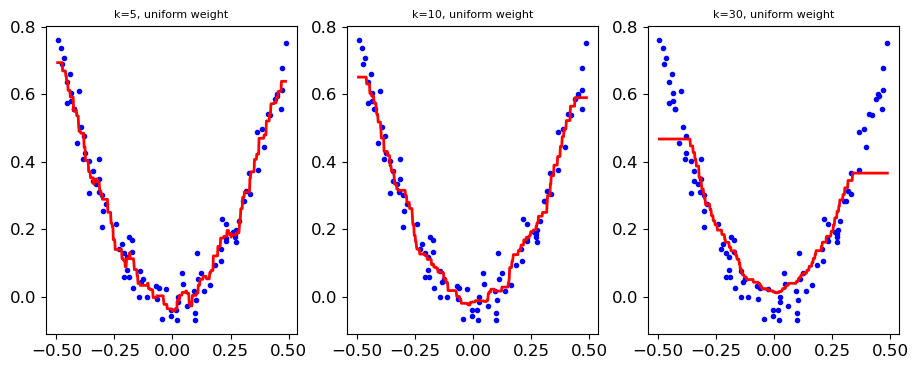

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_jobs=-1)

plt.figure(figsize=(11,4))
params = [(131, 5), (132, 10), (133, 30)]
for subplot, k in params:
    plt.subplot(subplot)
    knn_reg.set_params(n_neighbors=k).fit(X, y)
    X_new = np.linspace(min(X), max(X), 500)
    ypred = knn_reg.predict(X_new)
    plt.plot(X, y, "b.")
    plt.plot(X_new, ypred, "r-", linewidth=2)
    plt.title("k={}, uniform weight".format(k), fontsize=8)
plt.show()

Next, we try using weights that are the reciprocal of the distance measure. As you can see, the model over fits near the observation because of the weights. This happens regardless of the choice of $k$.

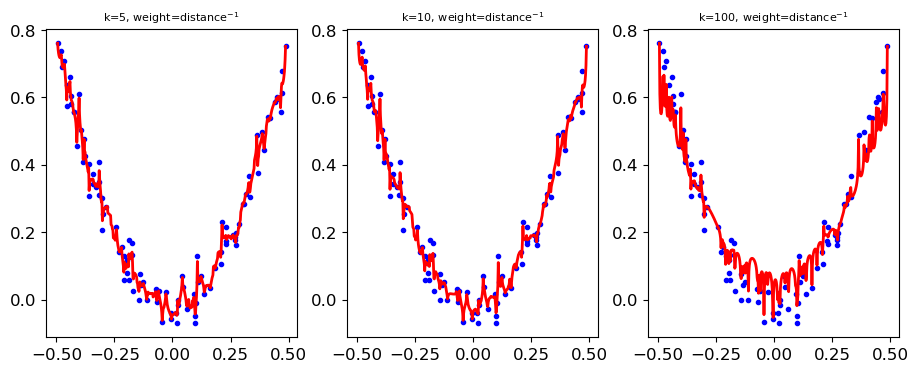

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_jobs=-1, weights='distance')

plt.figure(figsize=(11,4))
params = [(131, 5), (132, 10), (133, 100)]
for subplot, k in params:
    plt.subplot(subplot)
    knn_reg.set_params(n_neighbors=k).fit(X, y)
    X_new = np.linspace(min(X), max(X), 500)
    ypred = knn_reg.predict(X_new)
    plt.plot(X, y, "b.")
    plt.plot(X_new, ypred, "r-", linewidth=2)
    plt.title(r"k={}, weight=distance$^{{-1}}$".format(k), fontsize=8)
plt.show()

To remedy the problem, we can change the weight scheme to an exponential decay function. Here, we fix $k$ and vary $\gamma$.

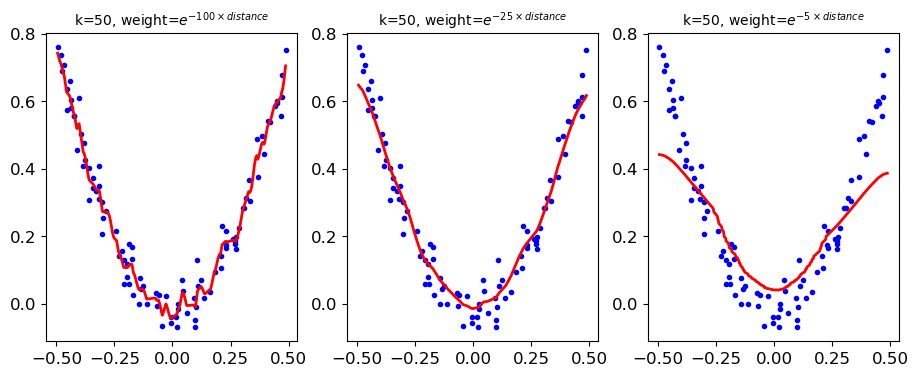

In [21]:
from sklearn.neighbors import KNeighborsRegressor
k=50
knn_reg = KNeighborsRegressor(n_jobs=-1, n_neighbors=k)

plt.figure(figsize=(11,4))
params = [(131, 100), (132, 25), (133, 5)]
for subplot, gam in params:
    plt.subplot(subplot)
    knn_reg.set_params(weights=lambda x: np.exp(-gam*x)).fit(X, y)
    X_new = np.linspace(min(X), max(X), 500)
    ypred = knn_reg.predict(X_new)
    plt.plot(X, y, "b.")
    plt.plot(X_new, ypred, "r-", linewidth=2)
    plt.title(r"k={}, weight=$e^{{-{}\times distance}}$"
              .format(k, gam), fontsize=10)
plt.show()

- Finally, we may try to predict $y^*$ from the "sub-sample" $\{(\mathbf{X}_{i}, y_{i})\}_{i=1}^k$ using another supervised learning method.

- For example, we can use a regression with polynomial features. That is, we first fit a regression
    $$\begin{align*}
          y_i= \beta_0 + f_p(\mathbf{X}_i,\beta) + \varepsilon_i;\quad i=1,\dots,k
    \end{align*}$$
  in which $f_p$ is a polynomial function of $\mathbf{X}_i$ with coefficients $\beta$.

- Then we set
      $$\begin{align*}
          y^*=\hat{\beta}_0 + f_b(\mathbf{X}_i,\hat{\beta})
      \end{align*}$$

- This is a form of a local polynomial regression model, and other common nonparametric methods for smoothing such as LOESS (locally estimated scatterplot smoothing) also fall into this category.

- We can clearly see that nonparametric regression has a lot in common with k-NN.

- Also, nothing stops you from fitting other models instead of a polynomial regression. You can use SVM, decision trees, random forest, etc.

- Note that these extensions are no longer "pure" instance-based learning, as they involved some model fitting. However, you would only fit the model to a (tiny) subset of the whole dataset.

- In this sense, you can create hybrid supervised learning methods in which you first use k-NN to choose a subset of data that is most relevant to where you are predicting and then use another method to obtain predictions.

- This can be useful in scenarios where the sheer size of the training data makes it impossible to train a model on the whole dataset. It can also help when you need to speed up your training and prediction (for example in online learning).